In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [5]:
import pandas as pd
import os

def read_files_to_dataframes(folder_path):
    dataframes = {}
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            # 读取CSV文件
            df = pd.read_csv(file_path, sep='\t')
            data = pd.DataFrame()
            data[['acc_X(g)', 'acc_Y(g)', 'acc_Z(g)', 'Time']] = df[['加速度X(g)', '加速度Y(g)', '加速度Z(g)', '时间']]
            data['Time'] = pd.to_datetime(data['Time'], format='%Y-%m-%d %H:%M:%S:%f')
            # 将DataFrame存储在以文件名为键的字典中
            dataframes[filename] = data
    return dataframes

# 使用示例
folder_path = 'simu_data'  # 替换成你的文件夹路径
dfs = read_files_to_dataframes(folder_path)

# 打印每个DataFrame的信息（可选）
for filename, df in dfs.items():
    filename = filename[0:12]
    print(f"Data from {filename}.")
    #print(df.head(2))  # 打印每个DataFrame的前2行


Data from 202401021400.
Data from 202401041224.
Data from 202401031846.
Data from 202401031311.
Data from 202401071509.
Data from 202401021801.
Data from 202401020038.
Data from 202401041245.
Data from 202401041903.
Data from 202401071753.
Data from 202401021338.


In [8]:
# 根据键排序
sorted_items = sorted(dfs.items())
# 创建一个新的有序字典
sorted_dfs = {k: v for k, v in sorted_items}
list(sorted_dfs.keys())

['20240102003855.txt',
 '20240102133855.txt',
 '20240102140017.txt',
 '20240102180106.txt',
 '20240103131121.txt',
 '20240103184624.txt',
 '20240104122441.txt',
 '20240104124534.txt',
 '20240104190346.txt',
 '20240107150904.txt',
 '20240107175320.txt']

Plotting data from 202401020...
Plotting data from 202401020...
Plotting data from 202401020...
Plotting data from 202401020...


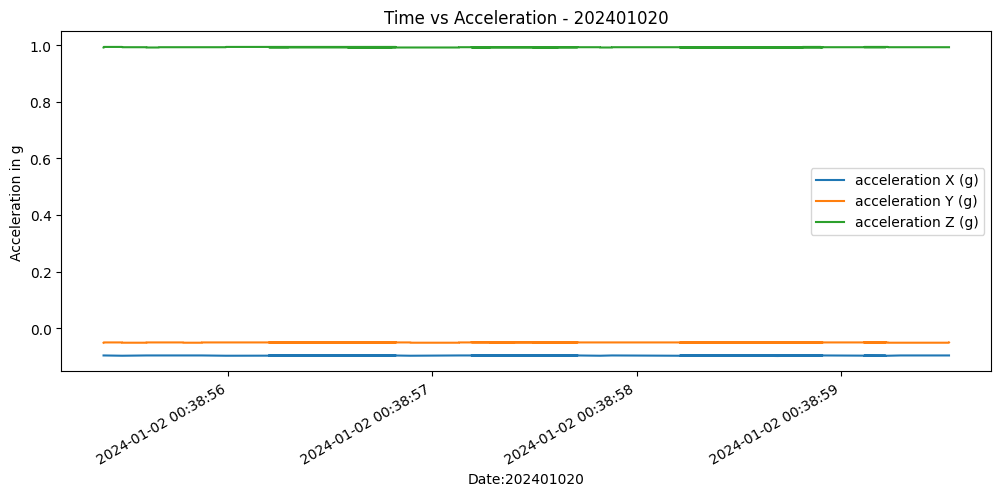

Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...


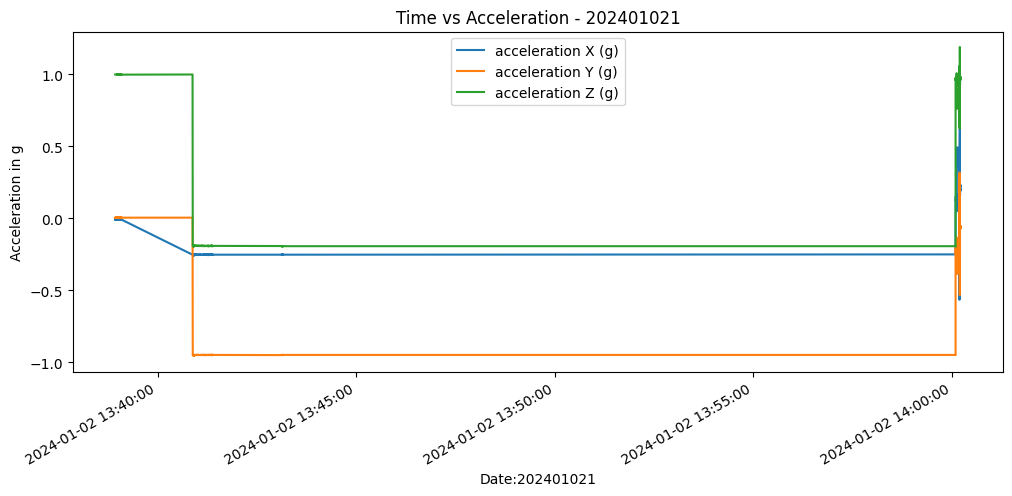

Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...


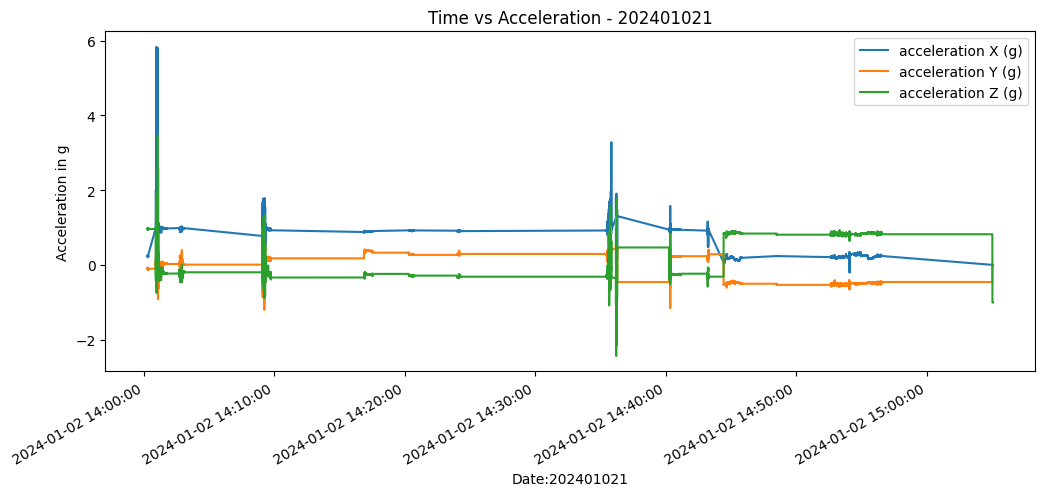

Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...


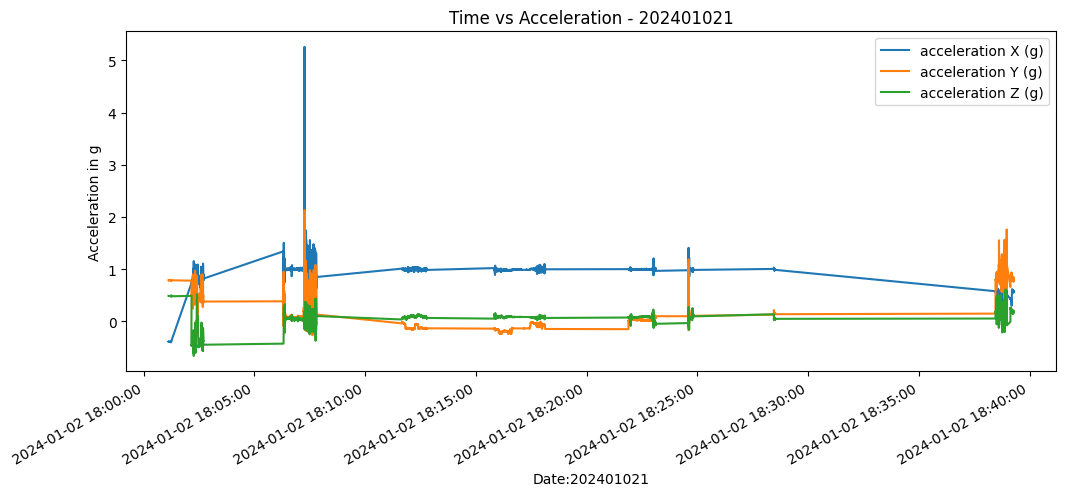

Plotting data from 202401031...
Plotting data from 202401031...
Plotting data from 202401031...
Plotting data from 202401031...


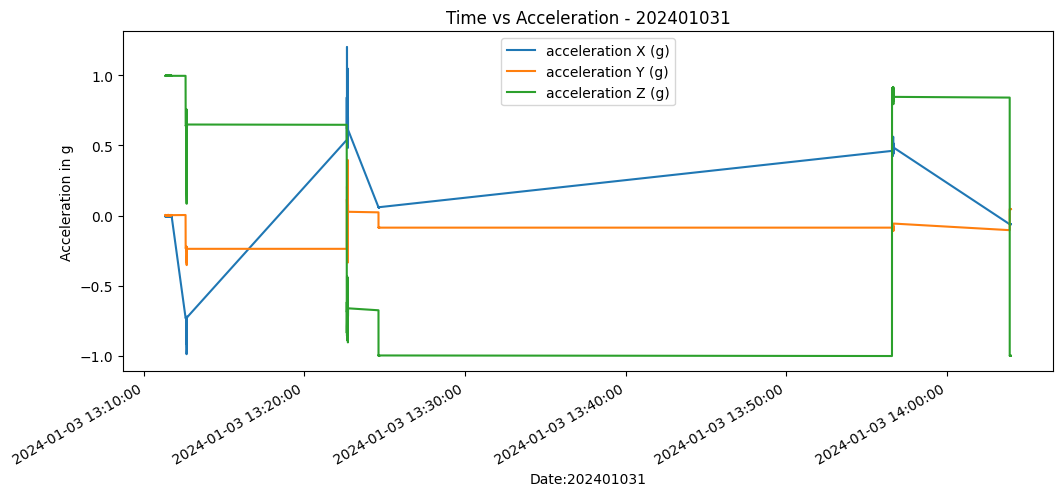

Plotting data from 202401031...
Plotting data from 202401031...
Plotting data from 202401031...
Plotting data from 202401031...


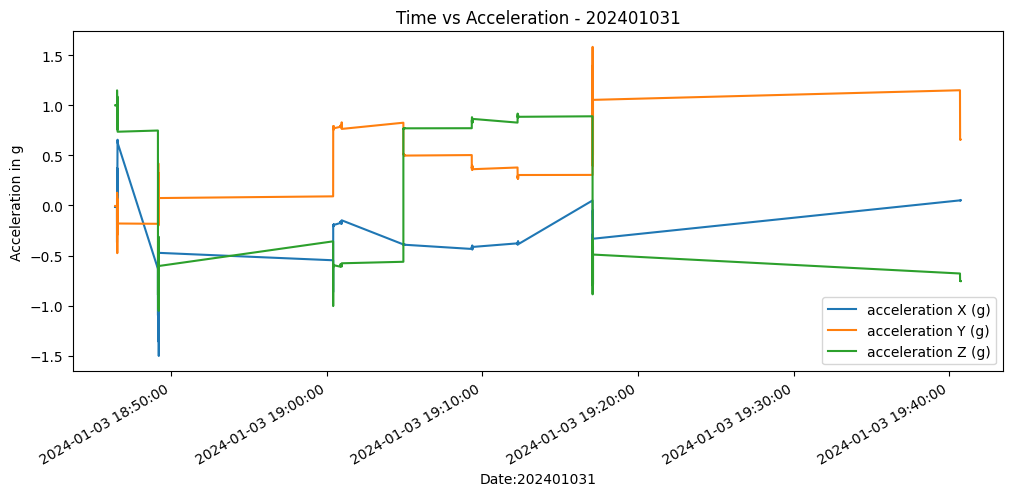

Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...


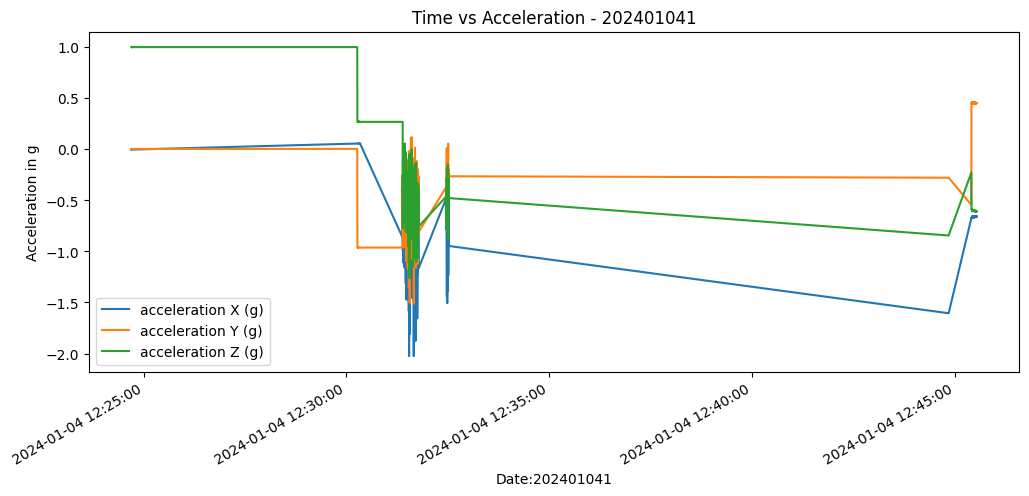

Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...


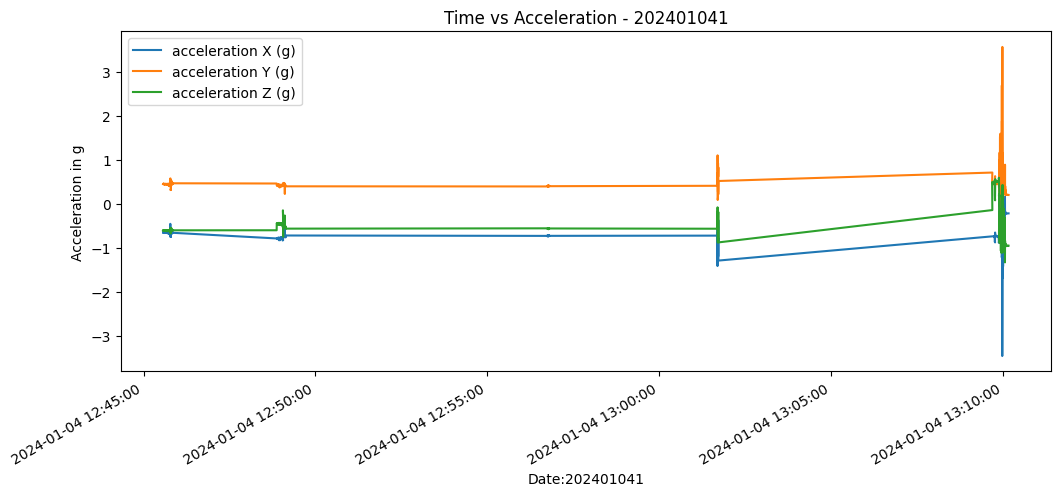

Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...


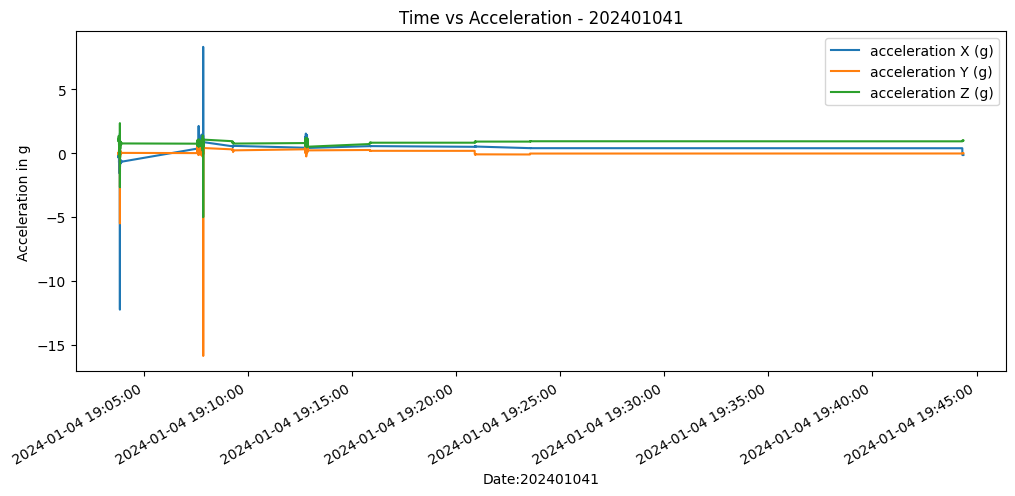

Plotting data from 202401071...
Plotting data from 202401071...
Plotting data from 202401071...
Plotting data from 202401071...


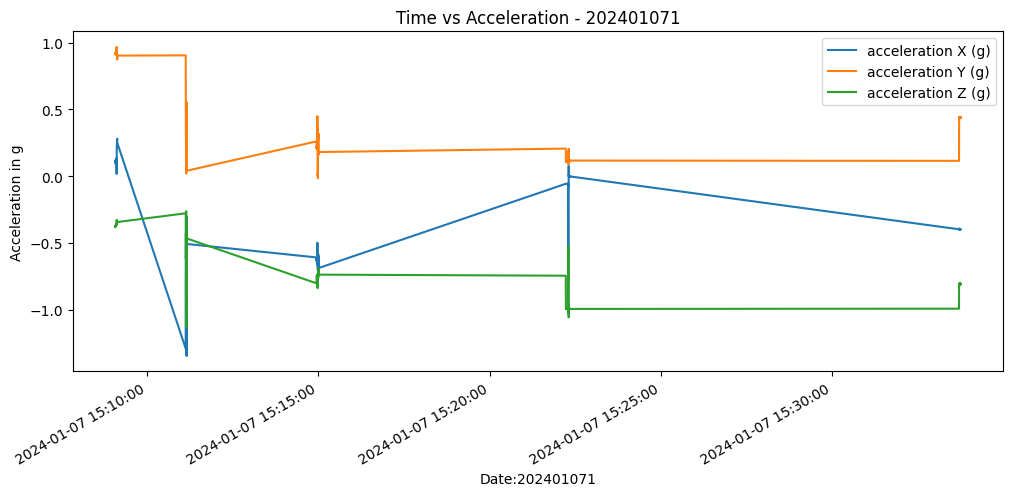

Plotting data from 202401071...
Plotting data from 202401071...
Plotting data from 202401071...
Plotting data from 202401071...


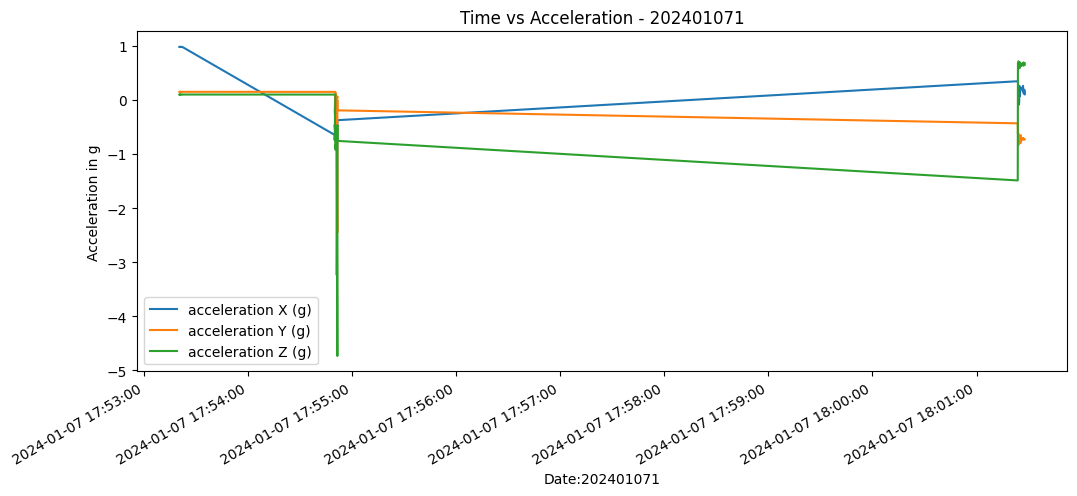

In [9]:

for filename, df in sorted_dfs.items():
    filename = filename[0:9]

    print(f"Plotting data from {filename}...")

    # 使用 Seaborn 重绘图表
    plt.figure(figsize=(12, 5))

    print(f"Plotting data from {filename}...")

    # 绘制每个加速度分量

    plt.plot(df['Time'], df['acc_X(g)'], label='acceleration X (g)')
    plt.plot(df['Time'], df['acc_Y(g)'], label='acceleration Y (g)')
    plt.plot(df['Time'], df['acc_Z(g)'], label='acceleration Z (g)')

    print(f"Plotting data from {filename}...")

    # 格式化图表
    plt.xlabel('Date:' + filename)
    plt.ylabel('Acceleration in g')
    plt.title(f'Time vs Acceleration - {filename}')
    plt.legend()
    plt.grid(False)

    print(f"Plotting data from {filename}...")

    # 改进日期格式化
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.show()


### import model

In [13]:
import joblib
# 加载模型
model = joblib.load('model_3_time_jumps.pkl')

# 现在可以使用模型进行预测等操作


### K-means

In [14]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import StandardScaler

In [15]:
# 选择加速度数据
for filename, df in sorted_dfs.items():
    acceleration_data = df[['acc_X(g)', 'acc_Y(g)', 'acc_Z(g)']]

    # 数据预处理：标准化
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(acceleration_data)

    # 时间序列数据通常需要特定的预处理
    # 这里我们使用 TimeSeriesScalerMeanVariance 将时间序列标准化为平均值为0，方差为1
    scaled_data = TimeSeriesScalerMeanVariance().fit_transform(scaled_data.reshape(scaled_data.shape[0], scaled_data.shape[1], 1))

    # 预测聚类标签
    labels = model.predict(scaled_data)
    df['Cluster'] = labels

Plotting data from 202401020...
Plotting data from 202401020...
Plotting data from 202401020...
Plotting data from 202401020...


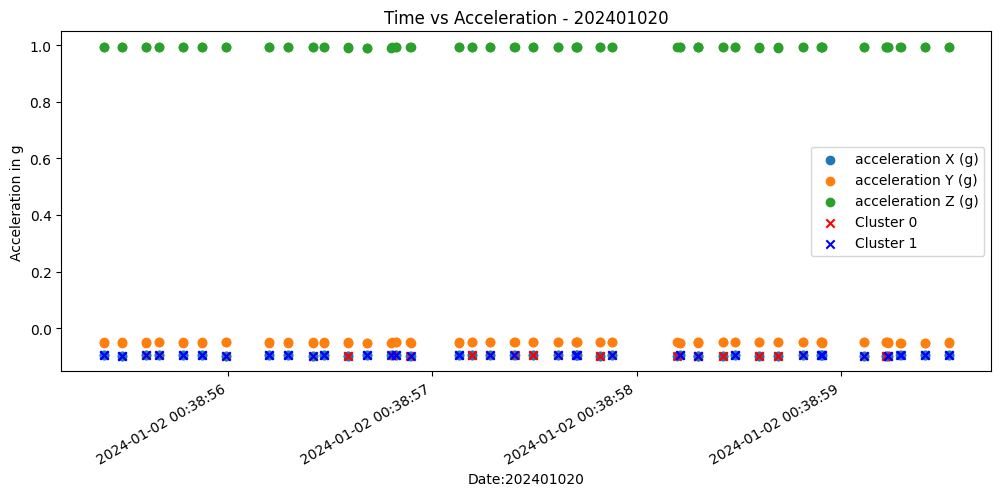

Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...


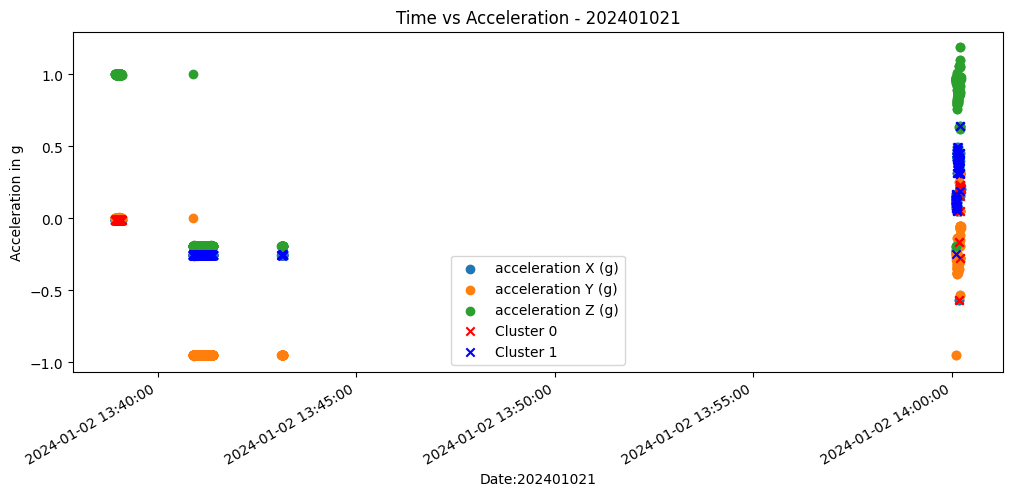

Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...


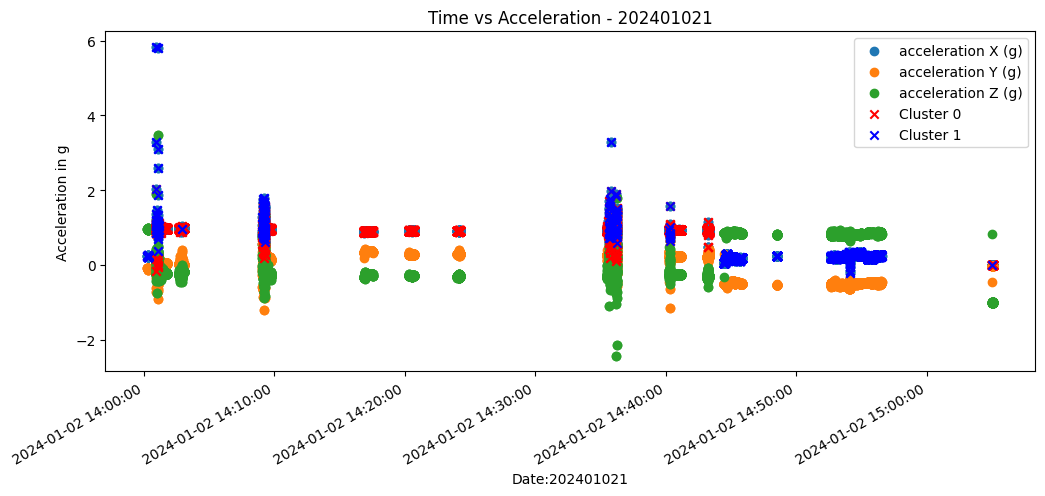

Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...
Plotting data from 202401021...


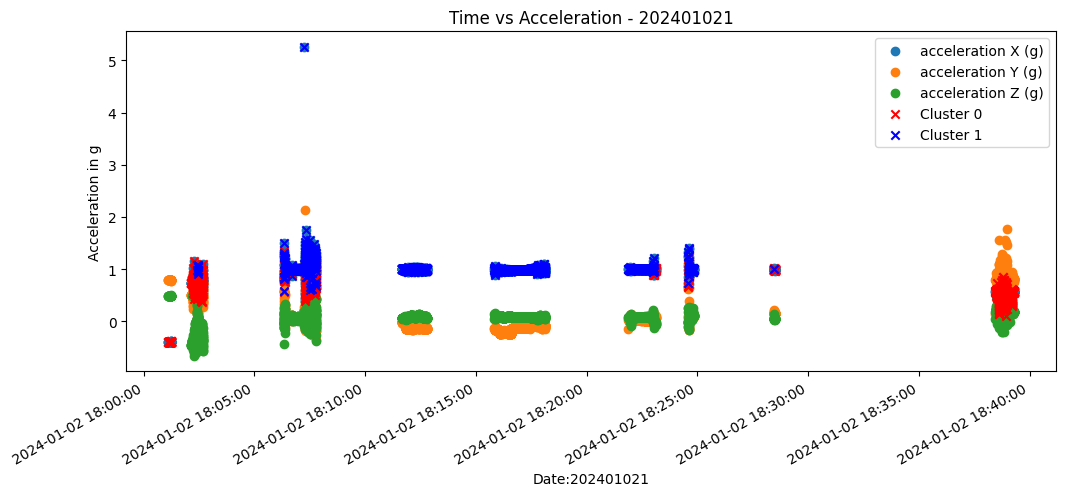

Plotting data from 202401031...
Plotting data from 202401031...
Plotting data from 202401031...
Plotting data from 202401031...


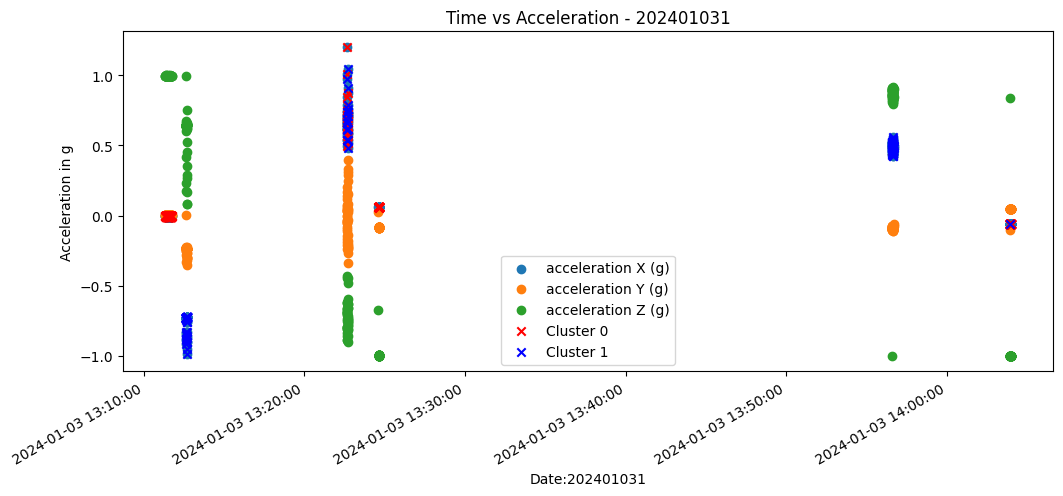

Plotting data from 202401031...
Plotting data from 202401031...
Plotting data from 202401031...
Plotting data from 202401031...


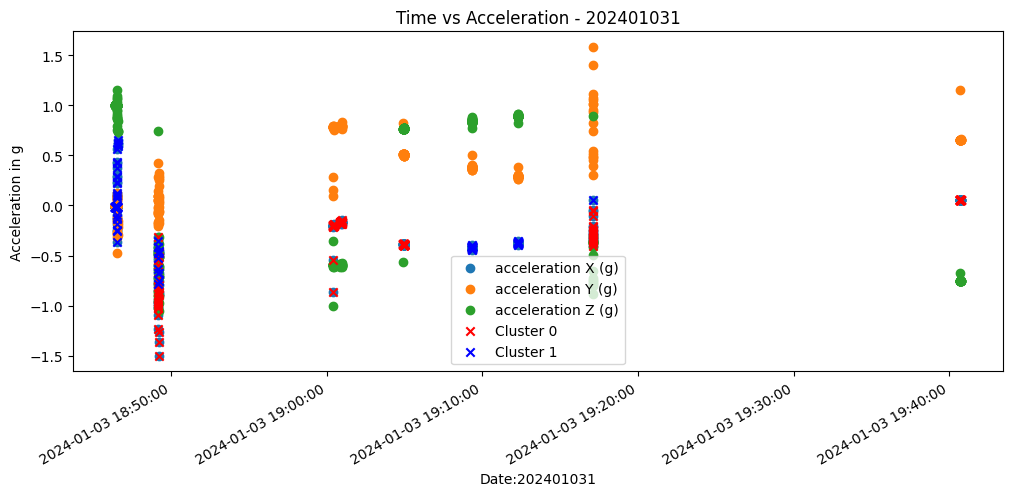

Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...


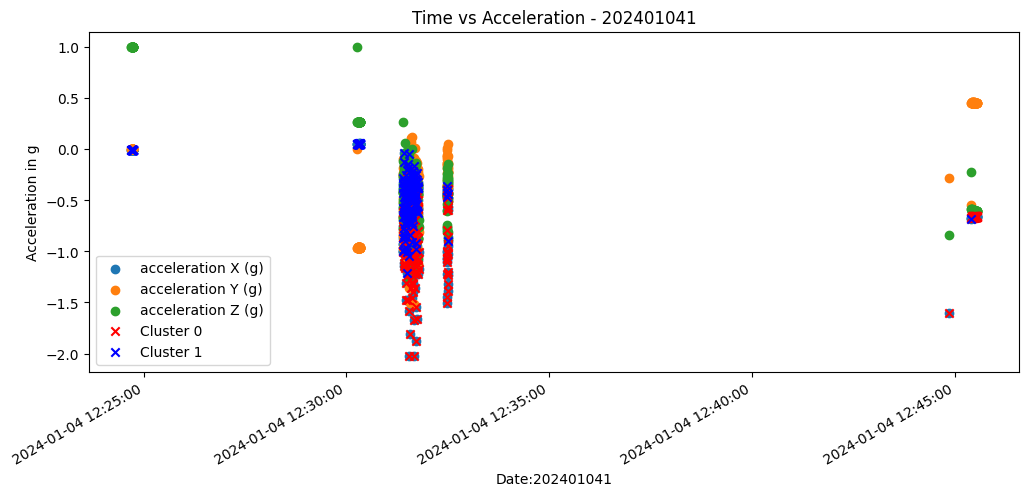

Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...


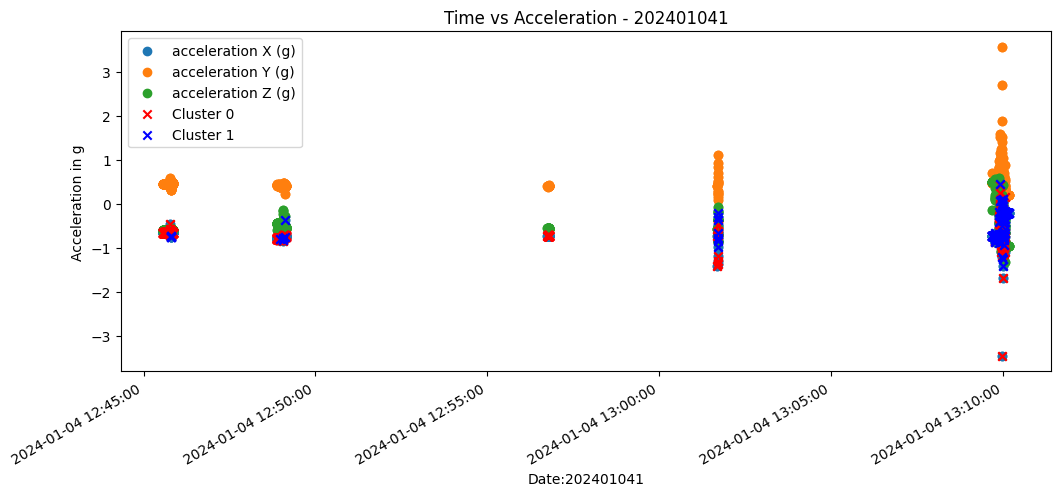

Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...
Plotting data from 202401041...


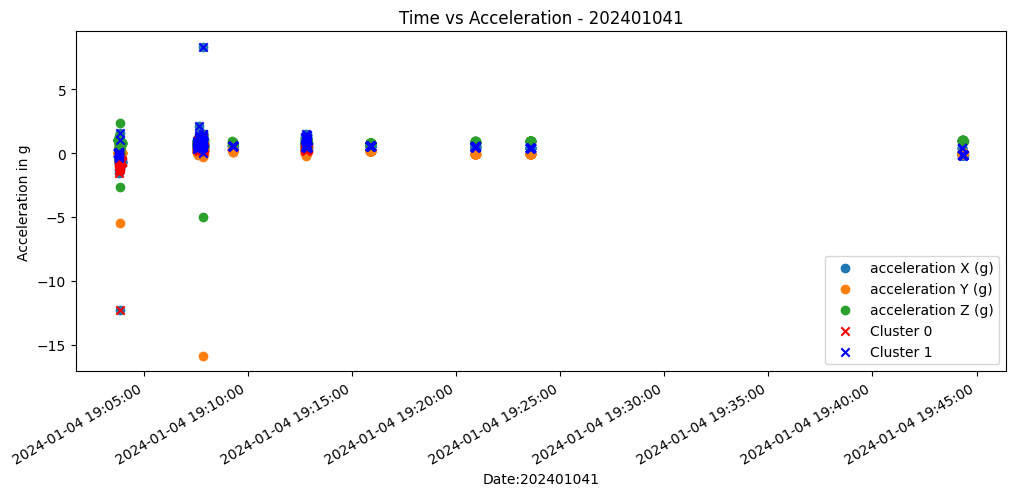

Plotting data from 202401071...
Plotting data from 202401071...
Plotting data from 202401071...
Plotting data from 202401071...


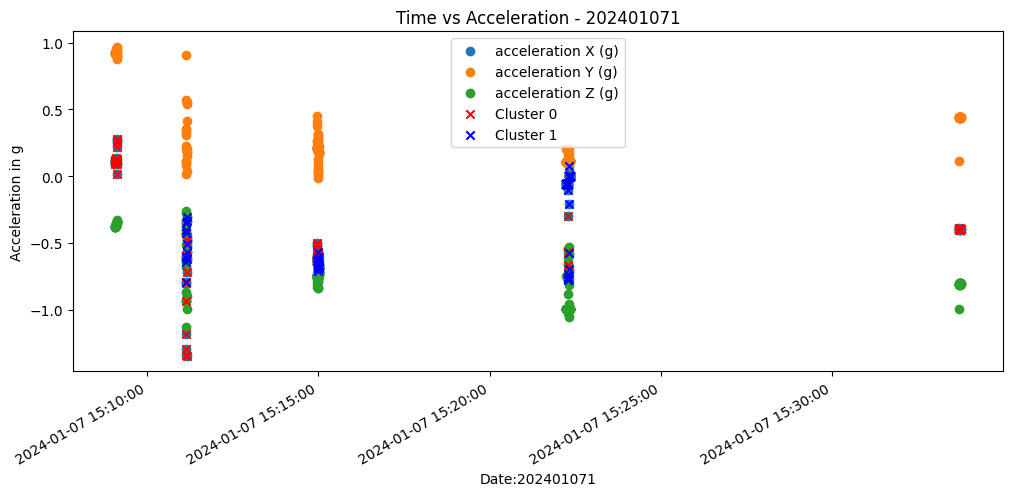

Plotting data from 202401071...
Plotting data from 202401071...
Plotting data from 202401071...
Plotting data from 202401071...


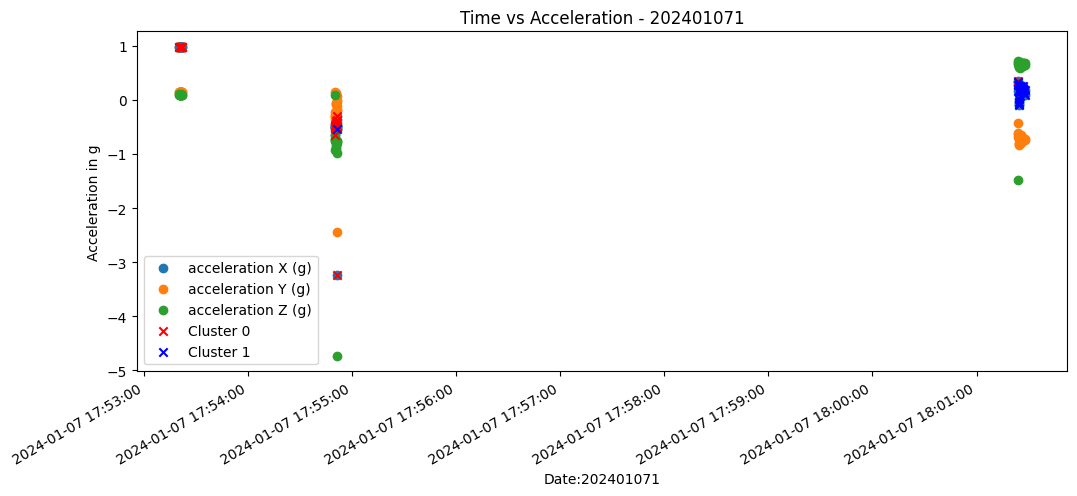

In [22]:

for filename, df in sorted_dfs.items():
    filename = filename[0:9]

    print(f"Plotting data from {filename}...")

    # 使用 Seaborn 重绘图表
    plt.figure(figsize=(12, 5))

    print(f"Plotting data from {filename}...")

    # 绘制每个加速度分量

    plt.scatter(df['Time'], df['acc_X(g)'], label='acceleration X (g)')
    plt.scatter(df['Time'], df['acc_Y(g)'], label='acceleration Y (g)')
    plt.scatter(df['Time'], df['acc_Z(g)'], label='acceleration Z (g)')

    plt.scatter(df[df['Cluster'] == 0]['Time'], df[df['Cluster'] == 0]['acc_X(g)'], color='red', label='Cluster 0', marker='x')
    plt.scatter(df[df['Cluster'] == 1]['Time'], df[df['Cluster'] == 1]['acc_X(g)'], color='blue', label='Cluster 1', marker='x')

    print(f"Plotting data from {filename}...")

    # 格式化图表
    plt.xlabel('Date:' + filename)
    plt.ylabel('Acceleration in g')
    plt.title(f'Time vs Acceleration - {filename}')
    plt.legend()
    plt.grid(False)

    print(f"Plotting data from {filename}...")

    # 改进日期格式化
    plt.gcf().autofmt_xdate()
    myFmt = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
    plt.gca().xaxis.set_major_formatter(myFmt)

    plt.show()
